In [8]:
import torch
import numpy as np

In [9]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [10]:
from src.train import prepare_training_data, train_unet, train_unet_plusplus, validate
from src.predict import predict
from src.unet import UNet
from src.unet_plusplus import UNetPlusPlus

In [23]:
n_epochs = 3
lr = 1e-2
batch_size = 1
weight_decay = 1e-5
random_state = np.random.RandomState(0)

In [18]:
train_loader, valid_loader = prepare_training_data(
    train_size=0.90, 
    batch_size=batch_size, 
    random_state=random_state)

In [24]:
train_unet_plusplus(
    train_loader,
    valid_loader,
    resume=True,
    n_epochs=n_epochs,
    lr=lr,
    weight_decay=weight_decay,
    loss_type='bce',
)

cuda:0
Epoch: 1
[1, 5] loss: 0.481320
[1, 10] loss: 0.413456
[1, 15] loss: 0.423409
[1, 20] loss: 0.460115
[1, 25] loss: 0.405935
[1, 30] loss: 0.472927
[1, 35] loss: 0.419854
[1, 40] loss: 0.429726
[1, 45] loss: 0.398515
[1, 50] loss: 0.418895
[1, 55] loss: 0.416661
[1, 60] loss: 0.436695
[1, 65] loss: 0.517389
[1, 70] loss: 0.470606
[1, 75] loss: 0.480133
[1, 80] loss: 0.441316
[1, 85] loss: 0.411550
[1, 90] loss: 0.423343
[1, 95] loss: 0.384233
[1, 100] loss: 0.361015
[1, 105] loss: 0.471670
[1, 110] loss: 0.408194
[1, 115] loss: 0.384237
[1, 120] loss: 0.377470
[1, 125] loss: 0.445061
[1, 130] loss: 0.440136
[1, 135] loss: 0.412191
[1, 140] loss: 0.514634
[1, 145] loss: 0.422494
[1, 150] loss: 0.379620
[1, 155] loss: 0.435395
[1, 160] loss: 0.397705
[1, 165] loss: 0.474443
[1, 170] loss: 0.466000
[1, 175] loss: 0.420279
[1, 180] loss: 0.390700
[1, 185] loss: 0.359817
[1, 190] loss: 0.404736
[1, 195] loss: 0.428372
Epoch: 2
[2, 5] loss: 0.463818
[2, 10] loss: 0.402145
[2, 15] loss: 

In [ ]:
# train_unet(train_loader, 
#       valid_loader, 
#       resume=True, 
#       n_epochs=n_epochs, 
#       lr=lr, 
#       weight_decay=weight_decay, 
#       loss_type='soft_dice', 
#       add_out_layers=False,
#       weight_map=True)

In [20]:
check_point = torch.load('../check_point/check_point')

In [21]:
model = UNetPlusPlus(in_channels=3, n_classes=2, padding=(117, 118, 108, 108))
for k,v in check_point.items():
    print(k)
model.load_state_dict(check_point['model_state_dict'])

epoch
model_state_dict
optimizer_state_dict


IncompatibleKeys(missing_keys=[], unexpected_keys=[])

In [22]:
validate(model, valid_loader, prune_level=4)
validate(model, valid_loader, prune_level=3)
validate(model, valid_loader, prune_level=2)
validate(model, valid_loader, prune_level=1)

cuda:0
Mean Dice Score: 0.657998
cuda:0
Mean Dice Score: 0.657994
cuda:0
Mean Dice Score: 0.662256
cuda:0
Mean Dice Score: 0.666686


In [ ]:
# model = UNet(in_channels=3, padding=(117, 118, 108, 108),  add_out_layers=False)
# for k,v in check_point.items():
#     print(k)
# model.load_state_dict(check_point['model_state_dict'])

In [26]:
predict(model=model, device='gpu')

cuda:0
(117, 118, 108, 108)
Model: UNet++
Predicted image 1 saved
Model: UNet++
Predicted image 2 saved
Model: UNet++
Predicted image 3 saved
Model: UNet++
Predicted image 4 saved
Model: UNet++
Predicted image 5 saved
Model: UNet++
Predicted image 6 saved
Model: UNet++
Predicted image 7 saved
Model: UNet++
Predicted image 8 saved
Model: UNet++
Predicted image 9 saved
Model: UNet++
Predicted image 10 saved
Model: UNet++
Predicted image 11 saved
Model: UNet++
Predicted image 12 saved
Model: UNet++
Predicted image 13 saved
Model: UNet++
Predicted image 14 saved
Model: UNet++
Predicted image 15 saved
Model: UNet++
Predicted image 16 saved
Model: UNet++
Predicted image 17 saved
Model: UNet++
Predicted image 18 saved
Model: UNet++
Predicted image 19 saved
Model: UNet++
Predicted image 20 saved


In [27]:
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline

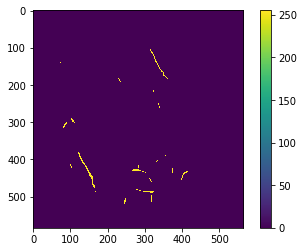

In [30]:
img = Image.open(os.path.join(module_path, 'data/predict/3.png'))
plt.imshow(img)
plt.colorbar()
plt.show()

In [ ]:
device = ('cuda:0' if torch.cuda.is_available() else 'cpu')

In [ ]:
torch.cuda.get_device_capability(device)

In [ ]:
torch.cuda.max_memory_allocated(device=device)/1024/1024